In [1]:
import numpy as np

import matplotlib.pyplot as plt

__Задание.__ Разложить в ряд Фурье функцию 
$$ f(x) = (3x + 1)^2 $$
на интервале $x \in (-1, 1)$. Построить графики рассматриваемой функции и
суммы ряда Фурье. Найти значения ряда Фурье в граничных точках рассматриваемого отрезка и в точках разрыва. С использованием программных
средств построить суммы ряда Фурье для 1, 2, 5 и 10 слагаемых, обосновать сходимость ряда.

_Условия Дирихле._ Если
1. функция $f(x)$ непрерывна или имеет конечное число точек разрыва 1-го рода на на отрезке $[a, b]$,
2. функция $f(x)$ монотонна или имеет конечное число точек экстремума на отрезке $[a, b]$,

то ряд Фурье сходится

1. к порождающей функции $f(x)$ внутри интервала $(a, b)$ во всех точках, где функция $f(x)$ непрерывна;
2. к полусумме левого и правого пределов функции $f(x)$ в точках разрыва $x_0$:
$$ \dfrac{1}{2} \left( f(x_0 - 0) + f(x_0 + 0) \right); $$
3. к полусумме предельных значений функции $f(x)$ в точках $x = a$, $x = b$:
$$ \dfrac{1}{2} \left( f(a + 0) + f(b - 0) \right). $$

Данная функция непрерывна на отрезке $[-1, 1]$ и имеет одну точку экстремума:
$$ \dfrac{df}{dx} = 2 (3x + 1) \cdot 3 = 6(3x + 1) = 0 $$
Отсюда $x = -\dfrac{1}{3} \in [-1, 1]$ — точка минимума функции $f(x)$. В этом легко убедиться, построив график.

In [2]:
def f(x: float):
    return (3 * x + 1)**2

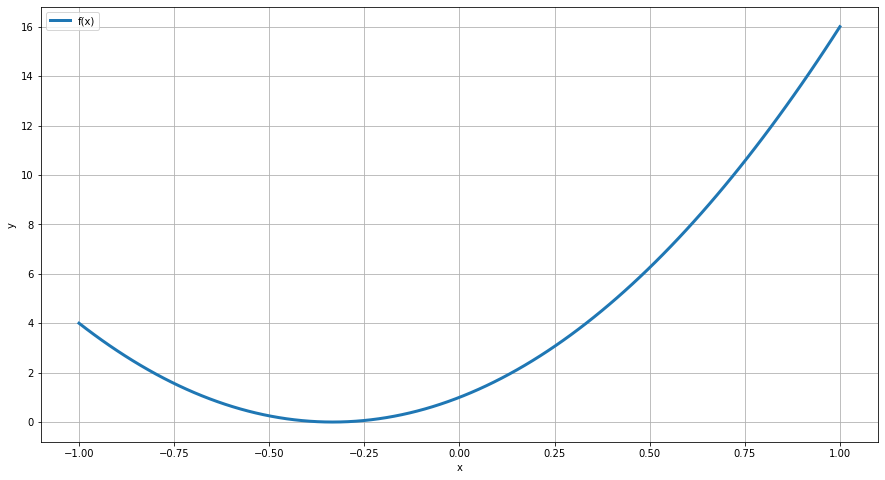

In [3]:
x = np.linspace(-1, 1, 100)

fig = plt.figure(figsize=(15, 8))

plt.plot(x, f(x), linewidth=3, label='f(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

_Ряд Фурье._ Если функция $f(x)$ удовлетворяет условиям Дирихле, то ее можно разложить в ряд Фурье на заданном интервале $[a, b]$:
$$ f(x) \sim \dfrac{a_0}{2} + \sum\limits_{n = 1}^\infty a_n \cos \dfrac{2 n \pi x}{b - a} + b_n \sin \dfrac{2 n \pi x}{b - a}, $$
где коэффициенты $a_0$, $a_n$, $b_n$, $n = 1, 2, \dots$ вычисляются по формулам:
$$ a_0 = \dfrac{2}{b - a} \int\limits_a^b f(x) dx, $$
$$ a_n = \dfrac{2}{b - a} \int\limits_a^b f(x) \cos\dfrac{2 n \pi x}{b - a} dx, \quad n = 1, 2, \dots $$
$$ b_n = \dfrac{2}{b - a} \int\limits_a^b f(x) \sin\dfrac{2 n \pi x}{b - a} dx, \quad n = 1, 2, \dots $$

Используя данные формулы, получаем
$$ a_0 = 8, \quad a_n = \dfrac{36}{(\pi n)^2} (-1)^n, \quad b_n = -\dfrac{12}{\pi n} (-1)^n, \quad n = 1, 2, \dots $$

Таким образом, ряд Фурье имеет вид
$$ f(x) \sim 4 + \sum\limits_{n = 1}^\infty \left[ \dfrac{36}{(\pi n)^2} (-1)^n \cos \pi n x - \dfrac{12}{\pi n} (-1)^n \sin \pi n x \right] $$

Частную сумму ряда Фурье будем записывать в виде
$$ S_N(x) =  4 + \sum\limits_{n = 1}^N \left[ \dfrac{36}{(\pi n)^2} (-1)^n \cos \pi n x - \dfrac{12}{\pi n} (-1)^n \sin \pi n x \right] $$

_Граничные точки._ Согласно условиям Дирихле, значение ряда Фурье на границах отрезка $[-1, 1]$ равняется полусумме предельных значений функции $f(x)$:
$$ S_N(-1) = S_N(1) = \dfrac{1}{2} (f(-1 + 0) + f(1 - 0)) = \dfrac{4 + 16}{2} = 10$$

_Точки разрыва._ Так как функция $f(x)$ непрерывна, то определять значения ряда Фурье в точках разрыва не требуется.

_Обоснование сходимости ряда с помощью программных средств._

In [4]:
# коэффициенты ряда Фурье
def a(n: int):
    if n > 0:
        return 36 / (np.pi * n) ** 2 * (-1) ** n
    elif n == 0:
        return 8


def b(n: int):
    if n > 0:
        return -12 / (np.pi * n) * (-1) ** n

In [5]:
# частная сумма ряда Фурье  
def S(x: float, N: int):
    s = 0
    # внутри интервала
    if -1 < x < 1:
        s = a(0) / 2
        for n in range(1, N + 1):
            s += a(n) * np.cos(np.pi * n * x) + b(n) * np.sin(np.pi * n * x)
    # в граничных точках
    elif x == -1 or x == 1:
        s = 1 / 2 * (f(-1) + f(1))
    
    return s

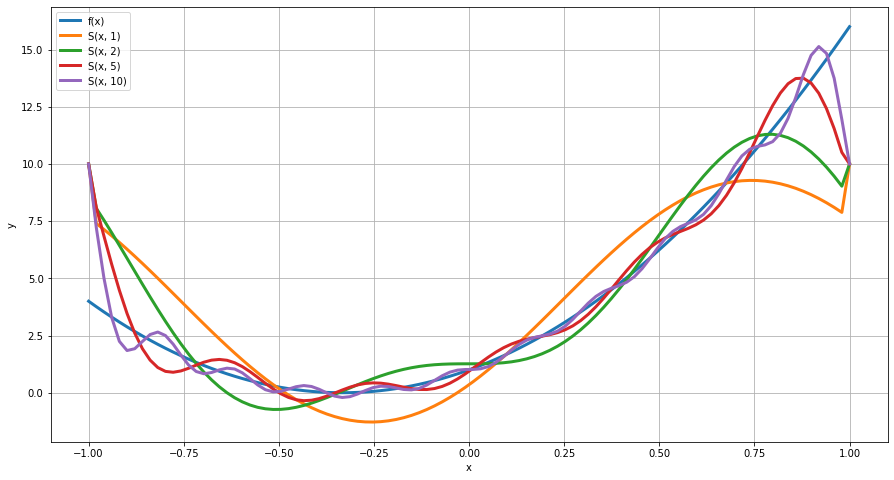

In [6]:
S2 = np.vectorize(S)

fig = plt.figure(figsize=(15, 8))

plt.plot(x, f(x), linewidth=3, label='f(x)')
plt.plot(x, S2(x, 1), linewidth=3, label='S(x, 1)')
plt.plot(x, S2(x, 2), linewidth=3, label='S(x, 2)')
plt.plot(x, S2(x, 5), linewidth=3, label='S(x, 5)')
plt.plot(x, S2(x, 10), linewidth=3, label='S(x, 10)')

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.legend()
plt.show()

__Задание.__ Разложить в ряд Фурье функцию 
$$ f(x) =
  \begin{cases}
    1       & \quad 0 \leq x < 1 \\
    4x  & \quad 1 < x \leq 2
  \end{cases}
$$
на интервале $x \in (0, 2)$. Построить графики рассматриваемой функции и
суммы ряда Фурье. Найти значения ряда Фурье в граничных точках рассматриваемого отрезка и в точках разрыва. С использованием программных
средств построить суммы ряда Фурье для 1, 2, 5 и 10 слагаемых, обосновать сходимость ряда.

Данная функция имеет разрыв в точке $x = 1$ и монотонна на отрезке $[0, 2]$ за исключением точки разрыва:
$$ \dfrac{df}{dx} = \begin{cases} 0, & 0 \leq x < 1 \\
                                    4, & 1 < x \leq 2\end{cases}$$

_Ряд Фурье._ Коэффициенты для ряда Фурье имеют вид
$$ a_0 = 7, \quad a_n = \dfrac{4}{(\pi n)^2} \left( 1 - (-1)^n \right), \quad b_n = \dfrac{3 (-1)^n - 7}{\pi n}, \quad n = 1, 2, \dots $$

Тогда,
$$ f(x) \sim 7 + \sum\limits_{n = 1}^\infty \left[ \dfrac{4}{(\pi n)^2} \left( 1 - (-1)^n \right) \cos(\pi n x) + \dfrac{3 (-1)^n - 7}{\pi n} \sin(\pi n x) \right] $$

Частную сумму будем записывать как
$$ S_N(x) = 7 + \sum\limits_{n = 1}^N \left[ \dfrac{4}{(\pi n)^2} \left( 1 - (-1)^n \right) \cos(\pi n x) + \dfrac{3 (-1)^n - 7}{\pi n} \sin(\pi n x) \right] $$

_Граничные точки._ Согласно условиям Дирихле, значение ряда Фурье на границах отрезка $[0, 2]$ равняется полусумме предельных значений функции $f(x)$:
$$ S(0) = S(2) = \dfrac{f(0 + 0) + f(2 - 0)}{2} = \dfrac{1 + 8}{2} = 4.5. $$

_Точки разрыва._ Согласно условиям Дирихле, значение ряда Фурье в точке разрыва $x_0 = 1$ равняется полусумме левого и правого пределов функции $f(x)$ в этой точке:
$$ S(1) = \dfrac{f(1 - 0) + f(1 + 0)}{2} = \dfrac{1 + 4}{2} = 2.5. $$

_Обоснование сходимости ряда с помощью программных средств._

In [7]:
def f(x: float):
    return np.piecewise(x, [0 <= x <= 1, 1 < x <= 2], [lambda x: 1, lambda x: 4 * x])

In [8]:
def a(n: int):
    if n > 0:
        return 4 / (np.pi * n) ** 2 * (1 - (-1) ** n)
    elif n == 0:
        return 7


def b(n: int):
    if n > 0:
        return (3 * (-1) ** n - 7) / (np.pi * n)

    
def S(x: float, N: int):
    if 0 < x < 1 or 1 < x < 2:
        s = a(0) / 2
        for n in range(1, N + 1):
            s += a(n) * np.cos(np.pi * n * x) + b(n) * np.sin(np.pi * n * x)
    elif x == 1:
        s = 1 / 2 * (f(0.99) + f(1.01))
    elif x == 0 or x == 2:
        s = 1 / 2 * (f(0) + f(2))
    
    return s

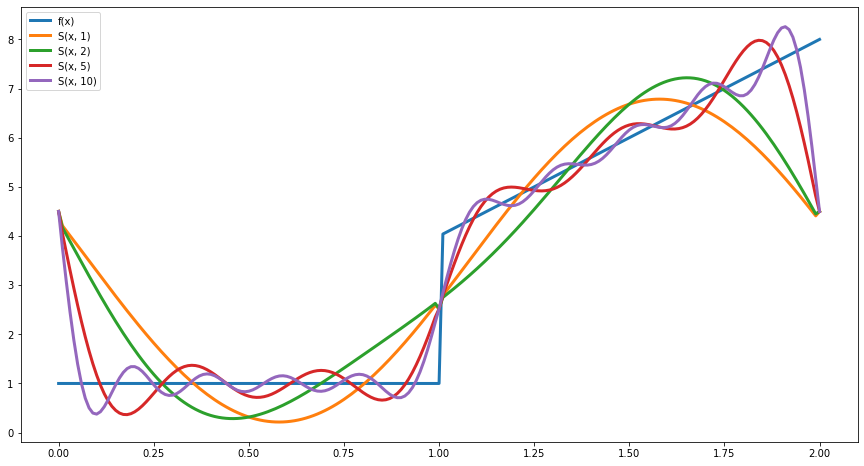

In [9]:
x = np.arange(0, 2.01, 0.01)
f2 = np.vectorize(f)
S2 = np.vectorize(S)

fig = plt.figure(figsize=(15, 8))

plt.plot(x, list(map(f, x)), linewidth=3, label='f(x)')
plt.plot(x, S2(x, 1), linewidth=3, label='S(x, 1)')
plt.plot(x, S2(x, 2), linewidth=3, label='S(x, 2)')
plt.plot(x, S2(x, 5), linewidth=3, label='S(x, 5)')
plt.plot(x, S2(x, 10), linewidth=3, label='S(x, 10)')

plt.legend()
plt.show()